In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from optimise_patient import Patient_opt

In [4]:
patients = pd.read_pickle('patient_df.pickle')

In [21]:
po = Patient_opt(patients, mutpb=0.05, n_indviduals=500)

po.run_optimisation()

/home/conor/miniconda3/envs/PHD/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/conor/miniconda3/envs/PHD/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'solution' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
100%|██████████| 100/100 [00:19<00:00,  5.02it/s]


In [23]:
df = pd.DataFrame(po.results).#iloc[-1,:]

In [49]:
#.idxmax()

0

45.24112798860114 1.742084254630072e-11


/home/conor/miniconda3/envs/PHD/lib/python3.8/site-packages/statsmodels/duration/survfunc.py:546: RuntimeWarning: divide by zero encountered in log
  denom = np.sqrt(nn) * np.log(self.surv_prob)


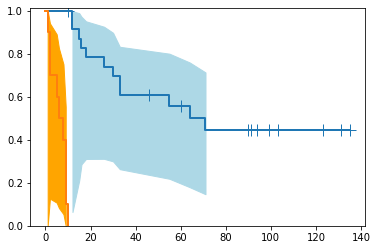

In [55]:
fig, ax = plt.subplots()

best = np.argmax(df['Fitnesses'])

duration = patients['survival (months)'].values
death_obs = (patients['DiedvsAlive'] == 'Died').values
groups = np.array(df['Individuals'][best])==1

# Perform log-rank test to determine statistic to maximise
stat, p = sm.duration.survdiff(duration, death_obs, groups)

sft = sm.SurvfuncRight(duration[groups], death_obs[groups])
lcb, ucb = sft.simultaneous_cb()
ax.fill_between(sft.surv_times, lcb, ucb, color='lightblue')

sff = sm.SurvfuncRight(duration[~groups], death_obs[~groups])
lcb, ucb = sff.simultaneous_cb()
ax.fill_between(sff.surv_times, lcb, ucb, color='orange')


sft.plot(ax=ax);
sff.plot(ax=ax);

print(stat, p)

In [57]:
sft.summary()

,Surv prob,Surv prob SE,num at risk,num events
Time,,,,
12.0,0.913043,0.058753,23,2.0
15.0,0.869565,0.070224,21,1.0
16.0,0.826087,0.079034,20,1.0
18.0,0.782609,0.086006,19,1.0
26.0,0.739130,0.091561,18,1.0
30.0,0.695652,0.095944,17,1.0
33.0,0.608696,0.101764,16,2.0
55.0,0.557971,0.105168,12,1.0
64.0,0.502174,0.108448,10,1.0
